In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Reshape, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [71]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Non_corr_datset.csv', sep='\t')

In [96]:
df.head()

,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature12,...,feature1034,feature1035,feature1036,feature1037,feature1042,feature1043,feature1049,feature1050,feature1056,feature1057
0,1,1,1761,1759,141,102068,191,66,125,54,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1761,1759,48,102563,191,79,0,91,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1554,1759,96,102374,191,5,125,187,...,0,24482,0,0,0,0,0,0,21081,0
3,1,1,1143,1143,72,104095,15,23,0,17,...,0,0,0,0,209,0,0,0,0,0
4,1,1,1690,8,22,102722,8,23,0,187,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Col2drop =[]
#for i in df.columns:
#     if len(set(df[i].unique())) == 1:
#        Col2drop.append(i)
#df = df.drop(Col2drop, axis=1)

In [ ]:
y = df.target
X = df.drop(['target'], axis=1)

In [108]:
X = df.drop(['id'], axis=1)
X = df.drop(['sample_ml_new'], axis=1)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler.mean_
df_new = scaler.transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
        df_new, y,
        test_size=0.2,
        random_state=42,
        stratify=y,
        shuffle=True)

print(X_train.shape, X_test.shape)

(29659, 418) (7415, 418)


In [104]:
zeros_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/100k_zeros_data.csv', sep='\t')

#Col2drop =[]
#for i in zeros_df.columns:
#     if len(set(zeros_df[i].unique())) == 1:
#        Col2drop.append(i)
#zeros_df = zeros_df.drop(Col2drop, axis=1)

print(zeros_df.shape)

zeros_df = zeros_df.drop(['id'], axis=1)
zeros_y = zeros_df.target
zeros_df = zeros_df.drop(['target', 'sample_ml_new'], axis=1)

scaler = StandardScaler()
scaler.fit(zeros_df)
scaler.mean_
zeros_df_new = scaler.transform(zeros_df)

print(zeros_df_new.shape)

(100000, 420)
(100000, 417)


In [125]:
zeros_y.shape

(100000,)

In [121]:
rf_clf = RandomForestClassifier()

In [122]:
rf_clf.fit(df_new, y)

RandomForestClassifier()

In [123]:
y_pred = rf_clf.predict(zeros_df_new)

In [130]:
zeros_df_new

array([[ 0.2833593 , -0.76028617,  0.08005426, ..., -0.06100754,
        -0.32390337, -0.22634535],
       [-1.04564516, -1.09449895, -1.57517019, ..., -0.06100754,
        -0.32390337, -0.22634535],
       [ 0.17181217, -1.96405709,  0.30373324, ..., -0.06100754,
        -0.32390337, -0.22634535],
       ...,
       [-1.49183371,  0.68393648, -0.68045427, ..., -0.06100754,
         1.23018276, -0.22634535],
       [-4.08291436,  0.68393648,  1.44449603, ..., -0.06100754,
        -0.32390337, -0.22634535],
       [ 0.57656892,  0.68393648, -1.53043439, ..., -0.06100754,
        -0.32390337, -0.22634535]])

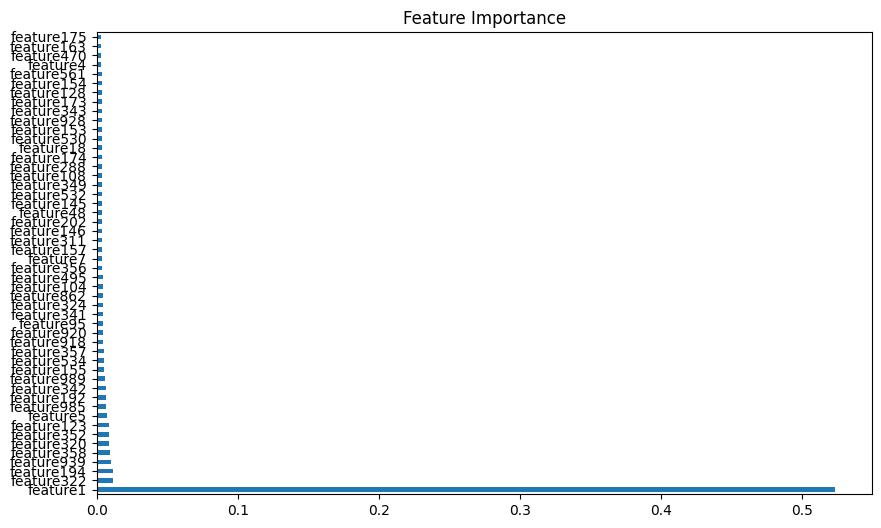

In [64]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf_clf.feature_importances_[:320], index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.nlargest(50).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [37]:
y_pred = rf_clf.predict(X_test)

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Samples-averaged Precision:', precision_score(zeros_y, y_pred))

print('Samples-averaged Recall:', recall_score(zeros_y, y_pred))

print('F1-Score: {}'.format(f1_score(zeros_y, y_pred)))

Samples-averaged Precision: 0.0
Samples-averaged Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.9998601007274762

In [16]:
gnb = GaussianNB()

In [17]:
gnb.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred = gnb.predict(X_test)